<a href="https://colab.research.google.com/github/xh313/compchem/blob/main/ChemOnPythonExplorations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 10 June 2022

I thought about doing this while taking notes in the group meeting. Taking notes on loose papers are just not practical but there aren't good ways to take chem notes on a computer (unlike math, where I can easily use markdown or $\LaTeX$). 

Therefore I began to investigate in ways to make my life easier and potentially even help research, since the project is computational chem anyway. Here we go.

So far I have found these potentially useful stuff:
- **BioPandas** which can deal with `.mol2` files and do computations such as RMSD of two molecules (good for conformer stuff)
- **RDKit** which can visualise, highlight and calculate the molecules / reactions
- **Mol2Grid** simply formatting stuff done by RDKit
- **ChemPy** which doesn't really deal with organic stuff but can be useful for inorganic and physical

I am not super fluent with any of these yet but I might as well just update my coding experiments and explorations here.

Today I tried to visualise molecules in notebooks, which could be handy for note-taking as I can even assign these molecules to variables and call them whenever needed. Might look like extra job at first but good if the molecule needs to be used thousands of times!

In [1]:
# Installations
!pip install rdkit-pypi -qqq


     |████████████████████████████████| 22.7 MB 1.3 MB/s 


In [2]:
# Imports

# Data
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import font_manager as fm
import seaborn as sns

# Texts
import regex as re

# Maths
import numpy as np

# Chemistry
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, rdChemReactions

In [3]:
sample = Chem.MolFromSmiles("Oc1ccc(cc1)C=Cc1cc(O)cc(c1)O")  
# Just a testing molecule

SMILES strings can be hand-written or pasted from ChemDraw. When a molecule is selected, click Edit -> Copy As... -> SMILES and paste it.

In [5]:
# Getting an image
def mol_to_pil_image(molecule: Chem.rdchem.Mol, 
                     width: int = 300, 
                     height: int = 300):
  """
  Convert a Mol object into an image. To get the Mol object, 
  use Chem.MolFromSmiles() to convert SMILES strings into Mol.
  """
  Chem.AllChem.Compute2DCoords(molecule)
  Chem.AllChem.GenerateDepictionMatching2DStructure(molecule, molecule)
  pil_image = Chem.Draw.MolToImage(molecule, size=(width, height))
  return pil_image

  mol_to_pil_image(sample)

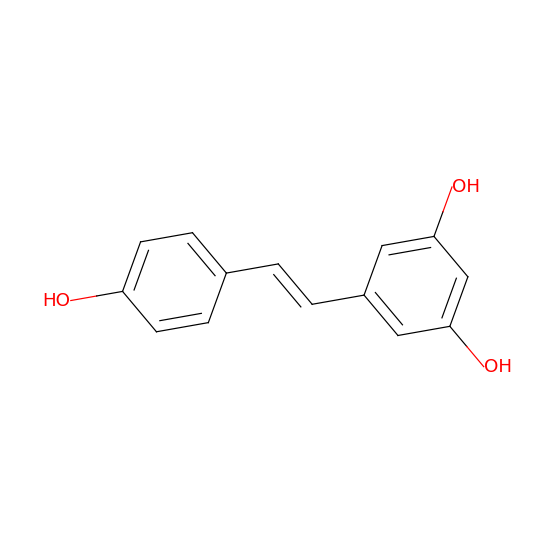

In [6]:
# Getting Matplotlib figures
fig = Draw.MolToMPL(sample, dpi=200)  # MPL figure object
plt.axis('off')

plt.show()

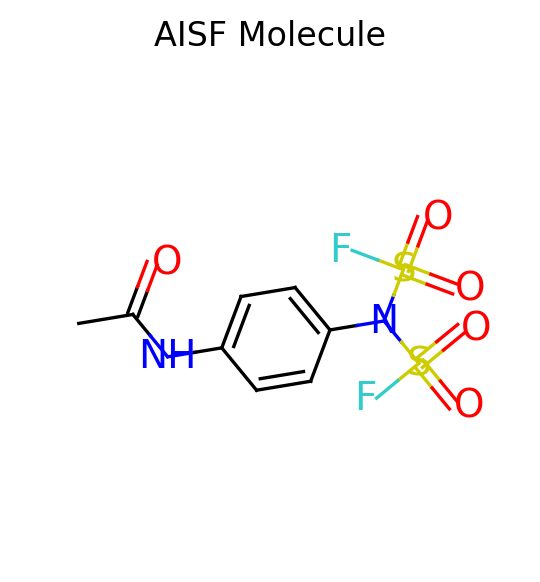

In [7]:
# AISF example
AISF = Chem.MolFromSmiles('CC(NC1=CC=C(N(S(=O)(F)=O)S(=O)(F)=O)C=C1)=O')
# Getting Matplotlib figures
fig = Draw.MolToMPL(AISF, size=(100,100))  # MPL figure object
fig.set_dpi(200)

plt.axis('off')
plt.title('AISF Molecule')

plt.show()

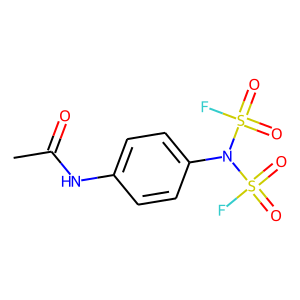

In [8]:
# PNG
mol_to_pil_image(AISF)

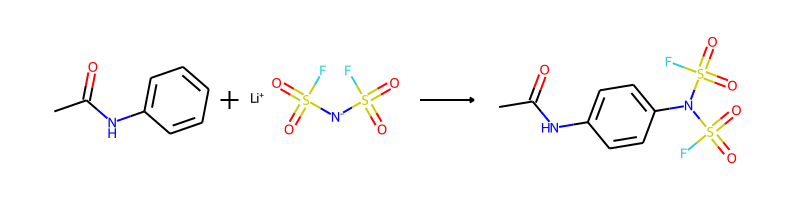

In [9]:
# Building a chemical rxn
rxn = rdChemReactions.ChemicalReaction()  # Init
acetanilide = Chem.MolFromSmiles('CC(NC1=CC=C([H])C=C1)=O')
LiBFA = Chem.MolFromSmiles('O=S([N-]S(=O)(F)=O)(F)=O.[Li+]')

rxn.AddReactantTemplate(acetanilide)  # Add reactant
rxn.AddReactantTemplate(LiBFA)
rxn.AddProductTemplate(AISF)  # Add product

fig = Draw.ReactionToImage(rxn)
fig

--2022-06-11 06:39:40--  https://github.com/xh313/compchem/raw/main/1-XH-AISF-HNMR.png
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/xh313/compchem/main/1-XH-AISF-HNMR.png [following]
--2022-06-11 06:39:40--  https://raw.githubusercontent.com/xh313/compchem/main/1-XH-AISF-HNMR.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45569 (45K) [image/png]
Saving to: ‘1-XH-AISF-HNMR.png’

1-XH-AISF-HNMR.png  100%[===================>]  44.50K  --.-KB/s    in 0.003s  

2022-06-11 06:39:40 (13.5 MB/s) - ‘1-XH-AISF-HNMR.png’ saved [45569/45569]



Text(0.43, 0.5, 'AISF')

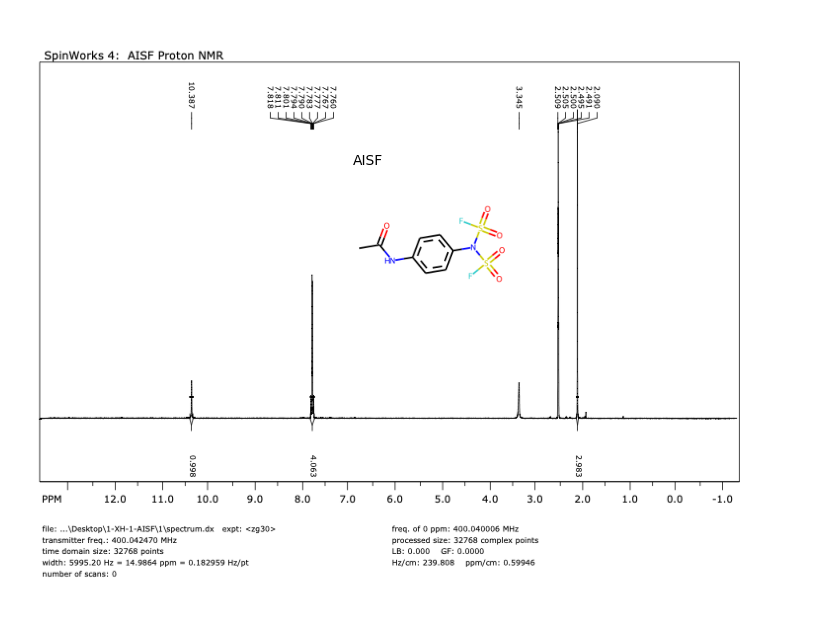

In [11]:
# Adding a reaction or molecule to a diagram

# Get the diagram of a NMR
!wget 'https://github.com/xh313/compchem/raw/main/1-XH-AISF-HNMR.png'
img = mpimg.imread('1-XH-AISF-HNMR.png')

plt.figure(dpi=200)
plt.imshow(img)
plt.axis('off')

# Add molecule as a sep axis
ax = plt.axes([0.43, 0.5, 0.2, 0.2], frameon=False)
ax.imshow(Chem.Draw.MolToImage(AISF, size=(200, 200), kekulize=False))
ax.axis('off')
ax.annotate('AISF', (0.43, 0.5), fontsize=5)